In [1]:
   ! pip install opencv-python


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.6/39.0 MB 9.4 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/39.0 MB 9.8 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/39.0 MB 10.6 MB/s eta 0:00:04
   ----------- ---------------------------- 10.7/39.0 MB 13.2 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/39.0 MB 14.7 MB/s eta 0:00:02
   ------------------- -------------------- 19.4/39.0 MB 15.7 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/39.0 MB 16.6 MB/s eta 0:00:01
   ---------------------------- ----------- 27.8/39.0 MB 16.8 MB/s eta 0:00:01
   --------------------------------- ------ 32.2/39.0 MB 17.4 MB/s eta 0:00:01
   ------------------------------------- -- 37.0/39.0 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 17.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.9 MB ? eta -:--

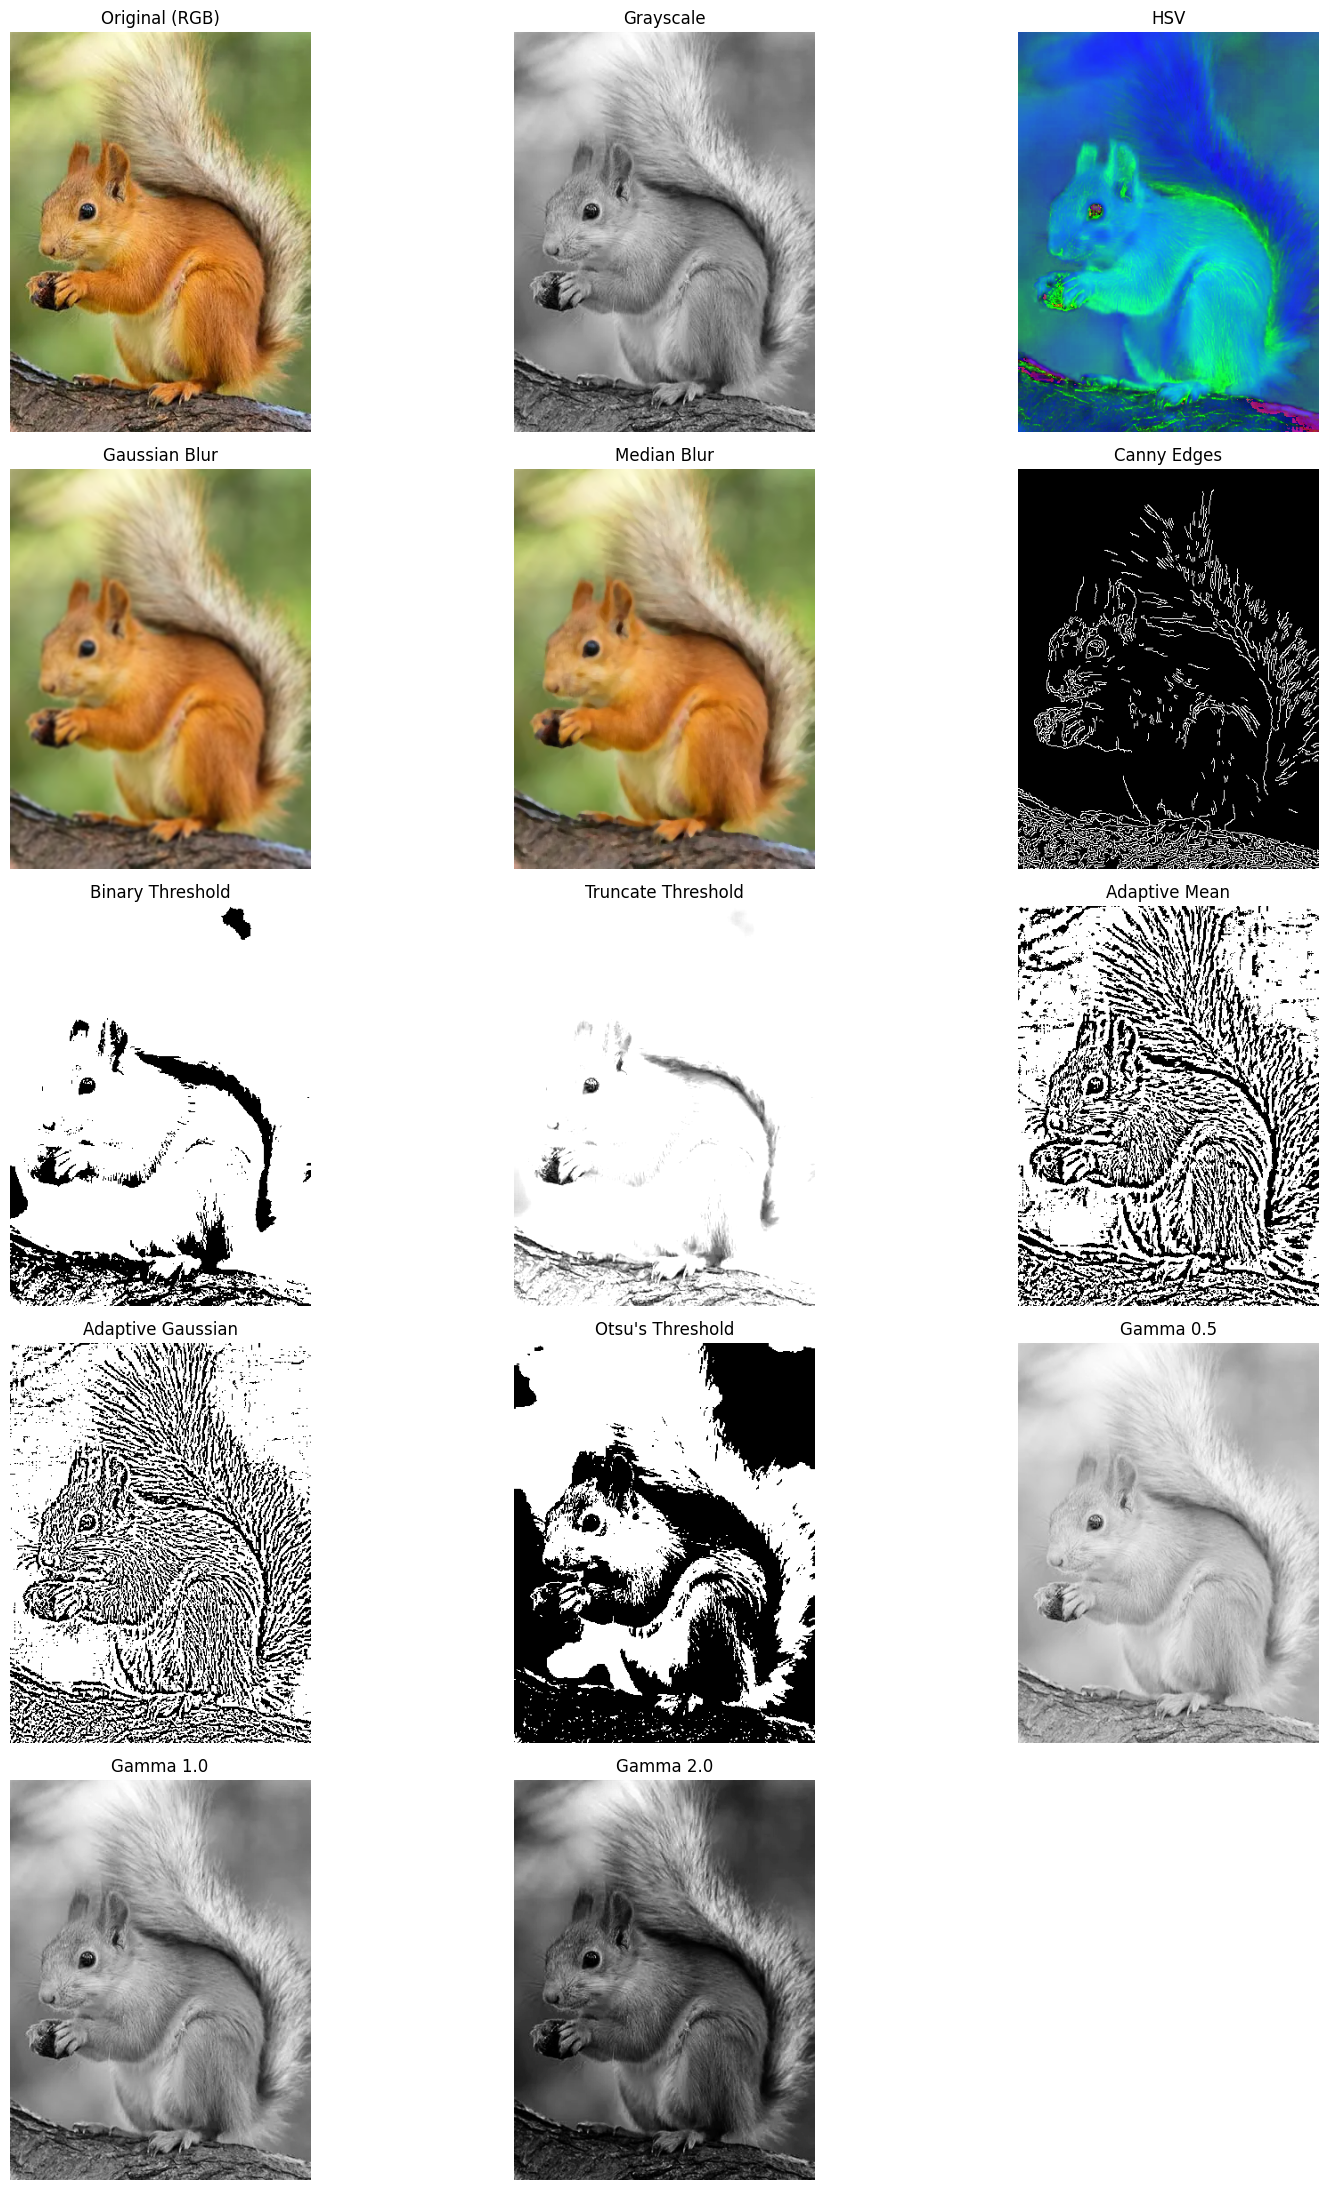

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_path = r'C:\Users\arshi\Downloads\Sq.webp'
img_color = cv2.imread(img_path)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    corrected_img = np.uint8(corrected * 255)
    return corrected_img


gamma_05 = gamma_correction(img_gray, 0.5)   
gamma_10 = gamma_correction(img_gray, 1.0)   
gamma_20 = gamma_correction(img_gray, 2.0)   


img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)


gaussian_blur = cv2.GaussianBlur(img_color, (7, 7), 0)
median_blur = cv2.medianBlur(img_color, 5)


edges = cv2.Canny(img_gray, 100, 200)


_, thresh_binary = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
_, thresh_trunc = cv2.threshold(img_gray, 100, 255, cv2.THRESH_TRUNC)
adaptive_thresh_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)
_, thresh_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)
median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)


titles = ['Original (RGB)', 'Grayscale', 'HSV', 'Gaussian Blur', 'Median Blur', 'Canny Edges',
          'Binary Threshold', 'Truncate Threshold', 'Adaptive Mean', 'Adaptive Gaussian',
          "Otsu's Threshold", "Gamma 0.5", "Gamma 1.0", "Gamma 2.0"]

images = [img_color_rgb, img_gray, img_hsv, gaussian_blur_rgb, median_blur_rgb, edges,
          thresh_binary, thresh_trunc, adaptive_thresh_mean, adaptive_thresh_gaussian,
          thresh_otsu, gamma_05, gamma_10, gamma_20]


plt.figure(figsize=(16, 22))  
for i in range(len(images)):
    plt.subplot(5, 3, i + 1)  
    cmap = 'gray' if len(images[i].shape) == 2 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.5 MB 12.0 MB/s eta 0:00:01
   ----------------------------- ---------- 5.5/7.5 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 17.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl (1.5 MB)
Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


In [3]:
def log_transform(image):
    image = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(image))  
    log_image = c * np.log(1 + image)
    return np.uint8(log_image)

In [4]:
log_image = log_transform(img_gray)

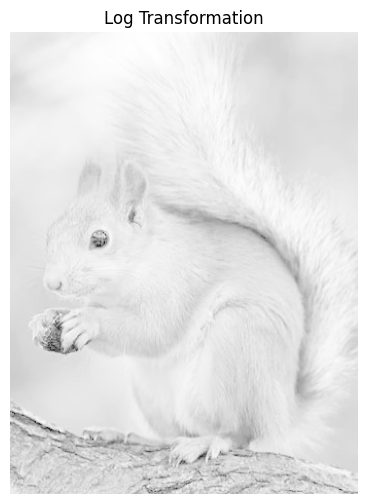

In [5]:
plt.figure(figsize=(6, 6))
plt.imshow(log_image, cmap='gray')
plt.title("Log Transformation")
plt.axis('off')
plt.show()

In [6]:
def reduce_brightness(image, value=50):
    reduced = np.clip(image - value, 0, 255)
    return np.uint8(reduced)
def negative_image(image):
    return 255 - image

In [7]:
brightness_reduced = reduce_brightness(img_gray, value=50)
negative_gray = negative_image(img_gray)

In [8]:
titles = ['Original Grayscale', 'Brightness Reduced', 'Negative Image']
images = [img_gray, brightness_reduced, negative_gray]

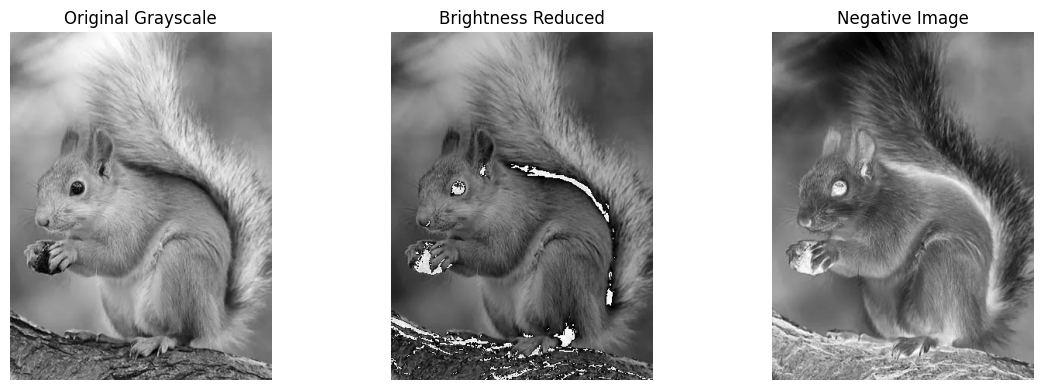

In [9]:
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np


image1 = cv2.imread(r'C:\Users\arshi\Downloads\Sq.webp')
image2 = cv2.imread(r'C:\Users\arshi\Downloads\sky.jpg')


if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))  


weightedSum = cv2.addWeighted(image1, 0.5, image2, 0.4, 0)


cv2.imshow('Weighted Image', weightedSum)


if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()
